In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

loading the dataset

In [50]:
data = pd.read_csv('cc_general.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [29]:
print("statistics of the dataset")
data.describe()

statistics of the dataset


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


missing valuess check

In [30]:
print("missing values")
data.isnull().sum()

missing values


,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


there are some missing values:

credit_limit collumn: 1

minimum_payments: 313

so i am gonna handle them and fill with collumn mean

In [51]:
numeric_cols = data.select_dtypes(include=np.number).columns

for col in numeric_cols:
    data[col].fillna(data[col].mean(), inplace=True)


<ipython-input-51-aaeb8d86293c>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


In [52]:
print("missing values")
data.isnull().sum()

missing values


,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [53]:
data_numeric = data.select_dtypes(include=[np.number])


normalization

In [54]:
numerical_features = data.select_dtypes(include=np.number).columns
data_numeric = data[numerical_features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_numeric)

In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
principalComponents = pca.fit_transform(scaled_data)
principalDf = pd.DataFrame(data = principalComponents)

after data preprocessing i will apply the k-means cluster

In [64]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(scaled_data)

if 'Cluster' not in data.columns:
  data['Cluster'] = kmeans.labels_

Elbow method

In [65]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

elbow method plot

Text(0, 0.5, 'Within-Cluster Sum of Squares (WCSS)')

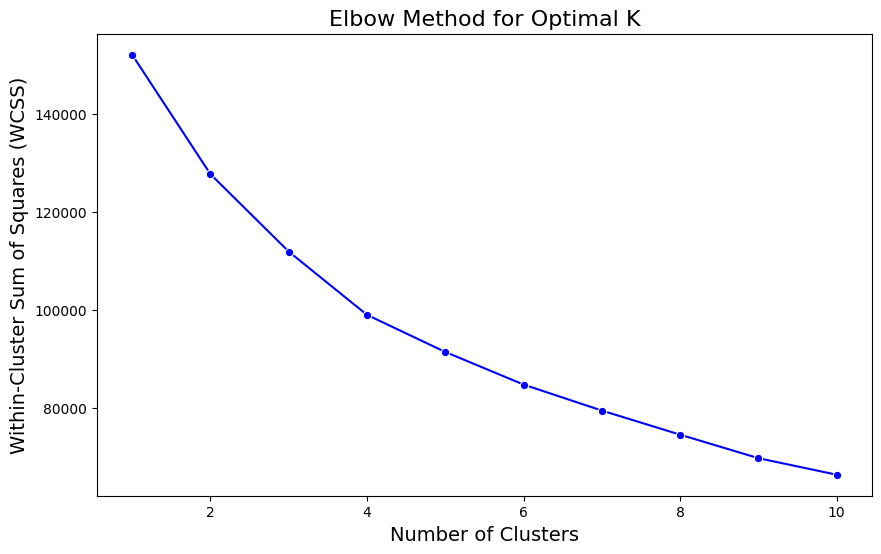

In [66]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, 11), y=wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=14)

it is ready for evaluating clustering using the silhouette score

In [67]:
sil_score =[]
for k in range(2,11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(scaled_data)
  sil_score.append(silhouette_score(scaled_data, kmeans.labels_))

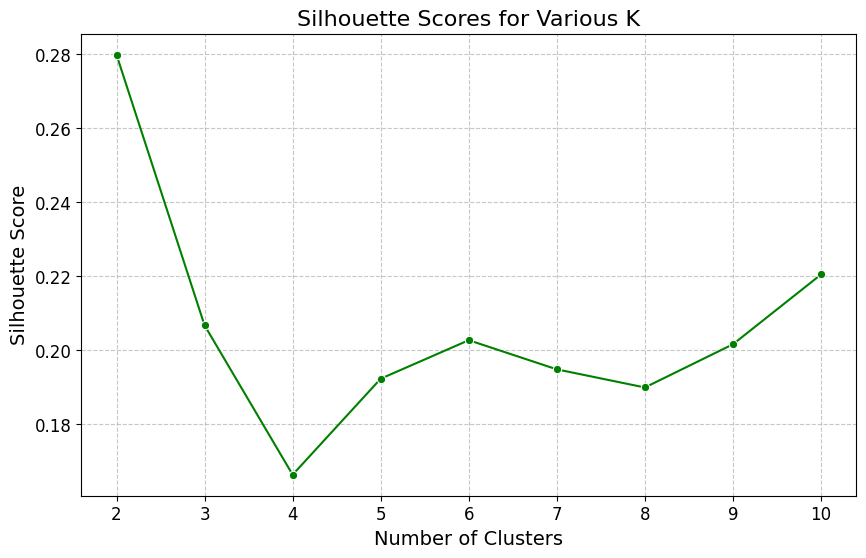

In [68]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(2, 11), y=sil_score, marker='o', linestyle='-', color='g')
plt.title('Silhouette Scores for Various K', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.show()


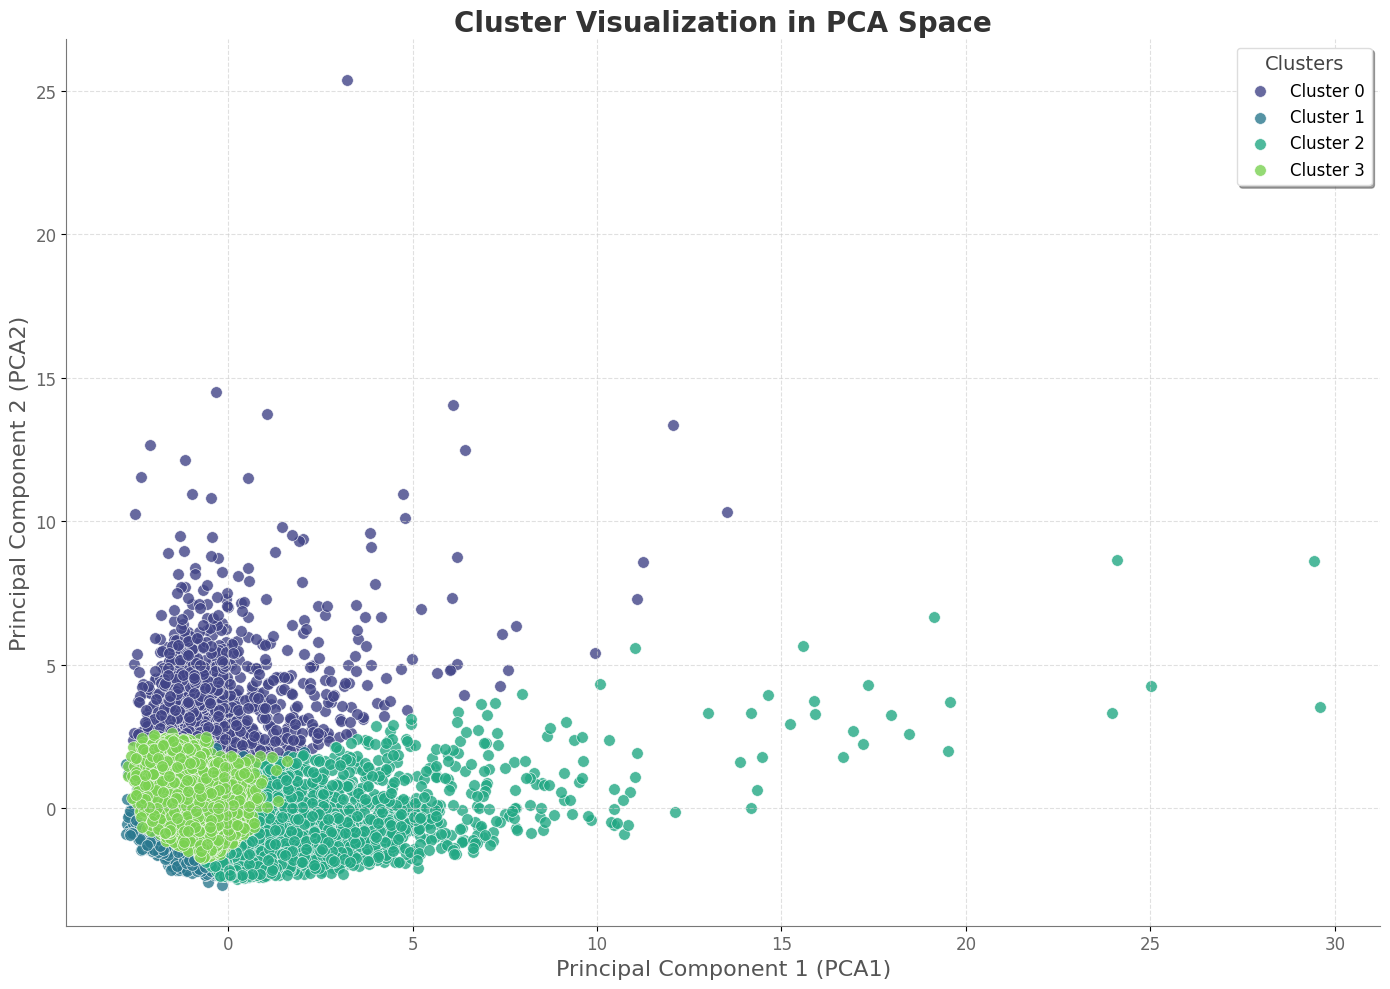

In [69]:
data['PCA1'] = principalDf[0]  # Assuming PCA1 is the first principal component
data['PCA2'] = principalDf[1]
plt.figure(figsize=(14, 10))
palette = sns.color_palette("viridis", len(np.unique(data['Cluster'])))

for cluster in np.unique(data['Cluster']):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'],
                s=70,
                label=f'Cluster {cluster}',
                color=palette[cluster],
                alpha=0.8,
                edgecolors='w',
                linewidths=0.5)

plt.title('Cluster Visualization in PCA Space', fontsize=20, fontweight='bold', color='#333333')
plt.xlabel('Principal Component 1 (PCA1)', fontsize=16, color='#555555')
plt.ylabel('Principal Component 2 (PCA2)', fontsize=16, color='#555555')

legend = plt.legend(title='Clusters', fontsize=12, title_fontsize=14,
                     loc='upper right',
                     frameon=True,
                     shadow=True,
                     edgecolor='#dddddd')
plt.setp(legend.get_title(), color='#444444')

plt.grid(True, linestyle='--', alpha=0.6, color='#cccccc')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('#777777')
plt.gca().spines['left'].set_color('#777777')

plt.xticks(fontsize=12, color='#666666')
plt.yticks(fontsize=12, color='#666666')

plt.tight_layout()
plt.show()

In [70]:
from sklearn.metrics import silhouette_score

# Assuming 'data_scaled' is your scaled data and 'kmeans' is your fitted KMeans model
silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.2205181120683996


In [71]:
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

Inertia: 66612.6924406699
